In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

In [67]:
data=pd.read_excel("Part2 - Company.xlsx")

In [68]:
#top five rows
data.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [69]:
#bottom five rows
data.tail()

,A,B,C,D,Quality
56,200,186,185,179,Quality B
57,137,182,165,199,NaN
58,88,39,9,102,NaN
59,180,157,192,198,NaN
60,157,135,135,156,NaN


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [71]:
#check missing values
data.isna().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [72]:
data.describe()

,A,B,C,D
count,61.000000,61.000000,61.000000,61.000000
mean,118.557377,116.639344,114.081967,114.459016
std,61.771494,57.897908,65.615368,63.144431
min,3.000000,5.000000,3.000000,3.000000
25%,61.000000,63.000000,59.000000,51.000000
50%,136.000000,138.000000,135.000000,132.000000
75%,171.000000,168.000000,174.000000,174.000000
max,200.000000,200.000000,200.000000,199.000000


- every feature in data have different min and max values
- data is spread over different values too

# Data analysis & visualisation: 

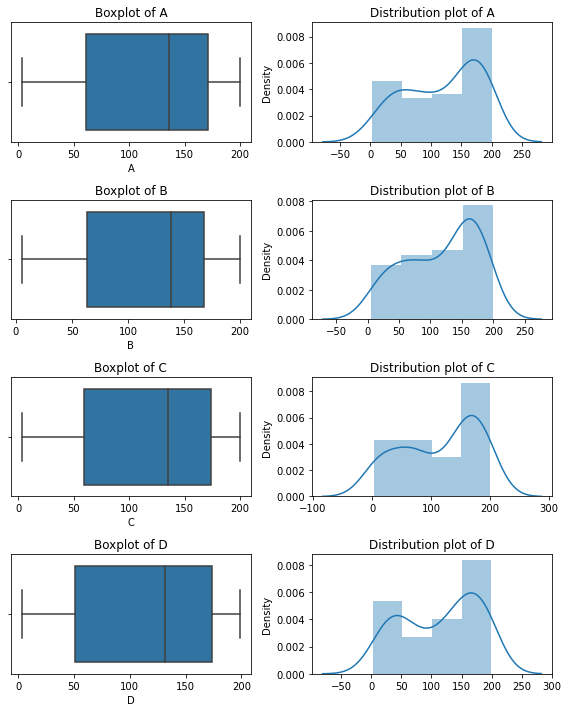

In [73]:
plt.subplots(4,2,figsize=(8,10))
i=0
for col in data.select_dtypes(include="int64").columns:
    i=i+1
    plt.subplot(4,2,i)
    sns.boxplot(x=col,data=data)
    plt.title("Boxplot of {}".format(col))
    i=i+1
    plt.subplot(4,2,i)
    sns.distplot(x=data[col],kde=True)
    plt.title("Distribution plot of {}".format(col))
    plt.tight_layout()

- ALL the clumns are bimodal in nature
- there are no outliers in the data

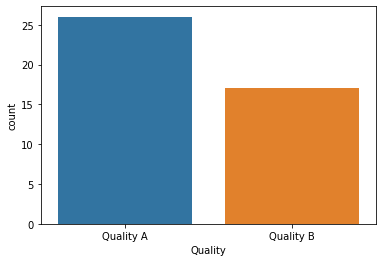

In [74]:
sns.countplot(x="Quality",data=data)

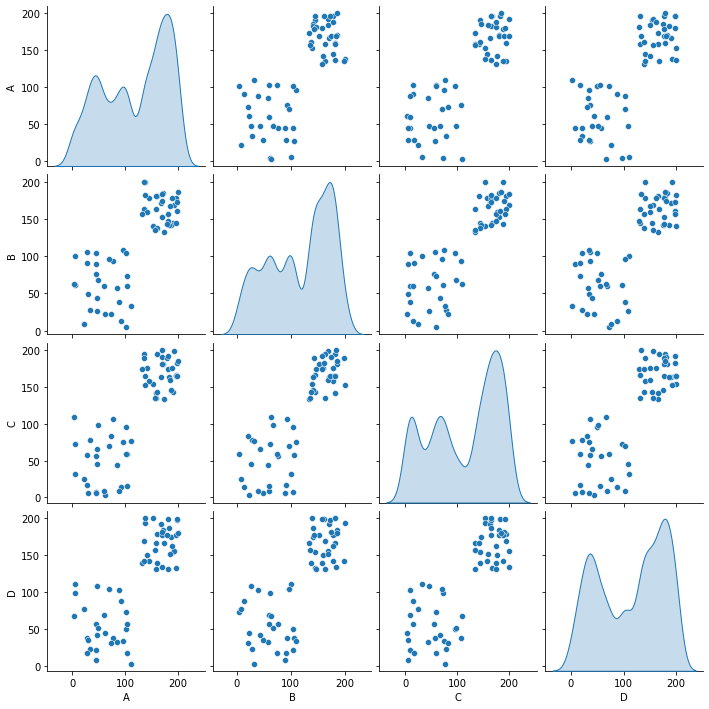

In [37]:
sns.pairplot(data,diag_kind='kde',diag_kws={'bw': 0.2})

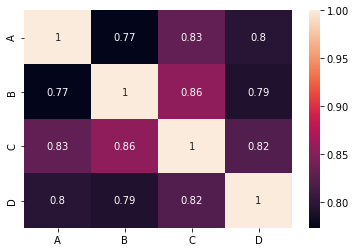

In [75]:
sns.heatmap(data.corr(),annot=True)

- Every feature is strongly correlated to each other

I will use the KNNImputer function from the impute module of the sklearn. KNNImputer helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.

In [76]:
def synthetic_data(df):
    
    #Map quality values to 0 and 1
    data["Quality"]=data["Quality"].map({"Quality A":0,"Quality B":1})
    #Normalize the data
    scaler=MinMaxScaler()
    df.iloc[:,0:-1]=scaler.fit_transform(df.iloc[:,0:-1])
    imputer=KNNImputer(n_neighbors=5)
    cols=df.columns
    # imputing the mising values
    df_imputed=pd.DataFrame(imputer.fit_transform(df),columns=cols)
    #reversing the normalised data to original scale
    df_imputed.iloc[:,0:-1]=scaler.inverse_transform(df_imputed.iloc[:,0:-1])
    # reversing the map created for the Quality Column
    df_imputed["Quality"]=df_imputed["Quality"].map({0:"Quality A",1:"Quality B"})
    data["Quality"]=data["Quality"].map({0:"Quality A",1:"Quality B"})
    return df_imputed

In [77]:
df_imputed=synthetic_data(data)

In [78]:
print("Imputed Dataframe:")
df_imputed.head()

Imputed Dataframe:


,A,B,C,D,Quality
0,47.0,27.0,45.0,108.0,Quality A
1,174.0,133.0,134.0,166.0,Quality B
2,159.0,163.0,135.0,131.0,Quality B
3,61.0,23.0,3.0,44.0,Quality A
4,59.0,60.0,9.0,68.0,Quality A


- Here i have created a dataframe with imputed values

### Checking Visually if imputation done are correct or not

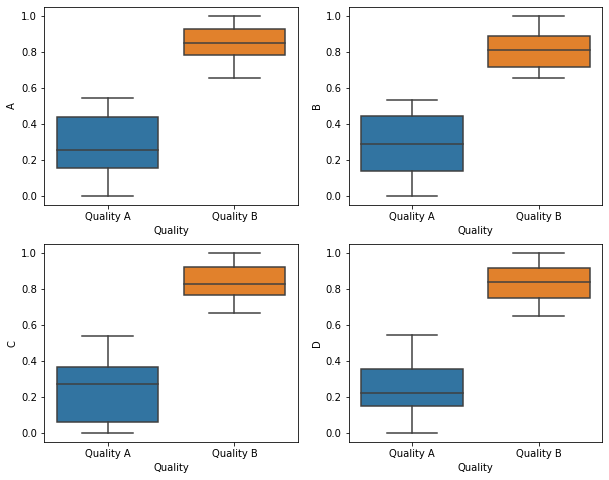

In [106]:
f, axes = plt.subplots(2, 2, figsize=(10,8))
sns.boxplot(x='Quality',y='A',data=data,ax=axes[0][0])
sns.boxplot(x='Quality',y='B',data=data,ax=axes[0][1])
sns.boxplot(x='Quality',y='C',data=data,ax=axes[1][0])
sns.boxplot(x='Quality',y='D',data=data,ax=axes[1][1])
plt.show()

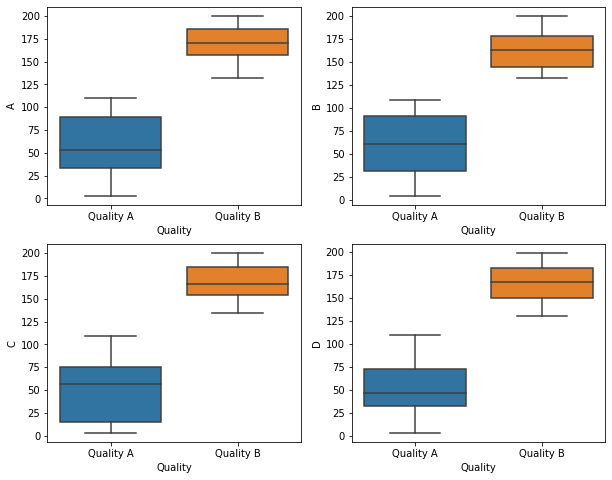

In [107]:
f, axes = plt.subplots(2, 2, figsize=(10,8))
sns.boxplot(x='Quality',y='A',data=df_imputed,ax=axes[0][0])
sns.boxplot(x='Quality',y='B',data=df_imputed,ax=axes[0][1])
sns.boxplot(x='Quality',y='C',data=df_imputed,ax=axes[1][0])
sns.boxplot(x='Quality',y='D',data=df_imputed,ax=axes[1][1])
plt.show()

- After checking the distribution of individual features on the basis of Quality feature it is evident that both the Original Dataframe and imputed dataframe have same kind of distribution for all the features
- thus visually it can be confirmed that imputation done are correct


- i wil use chi square test to check if the Quality column of original dataframe and imputed dataframe are significantly same or not

# Statistical Test

In [108]:
crosstab=pd.crosstab(data["Quality"],df_imputed["Quality"])
chi,p_value,dof,expected=chi2_contingency(tab)
if p_value < 0.05:  # Setting our significance level at 5%
    print('RESULT:Rejecting Null Hypothesis Distribution of Quality column of actual and imputed dataframe are same')
else:
    print('RESULT:Fail to Reject Null HypothesisDistribution of Quality column of actual and imputed dataframe are not same')

RESULT:Rejecting Null Hypothesis Distribution of Quality column of actual and imputed dataframe are same


- Since Distribution of actual and imputed values is same we can replace the Quality Column of Actual Dataframe with Quality Column of imputed Dataframe
## Final Dataframe

In [109]:
data["Quality"]=df_imputed["Quality"]

In [110]:
data.isna().sum()

A          0
B          0
C          0
D          0
Quality    0
dtype: int64